In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
%matplotlib inline

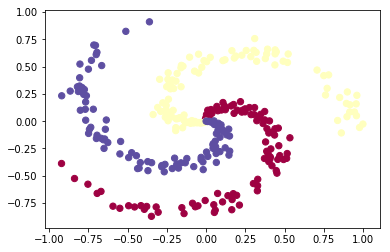

In [5]:
#Spiral Data
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

inputs = X
outputs = y

outputs = np.array(pd.get_dummies(outputs))

In [6]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def graph(w1, w2):
    plt.figure()
    xx, yy = make_meshgrid(inputs[:, 0], inputs[:, 1])
    Z = np.c_[xx.ravel(), yy.ravel()]

    Z = predict(Z)

    Z = np.argmax(Z, axis=1)

    Z = Z.reshape(xx.shape)
    cp = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(inputs[:, 0], inputs[:, 1], c=np.argmax(outputs, axis=1), cmap=plt.cm.coolwarm, s=20, edgecolors='k')


In [7]:
def sigmoid(x, derivative=False):
    sigma = 1/(1+np.exp(-(x)))
    if derivative:
        return sigma * (1-sigma)
    else:
        return sigma

In [9]:
iterations=50000
alpha=.1

hiddenlayersize=100 
weights1=np.zeros((inputs.shape[1],hiddenlayersize))
weights2=np.zeros((weights1.shape[1],outputs.shape[1]))


for iteration in range(iterations):   
    H1=sigmoid(np.matmul(inputs,weights1))
    H2=sigmoid(np.matmul(H1,weights2))
    
    dist=H2-outputs
    dOdH2 = np.matmul(inputs.T, dist) / inputs.shape[0]
    dH2dZ2 = sigmoid(H2, derivative=True)
    dOdZ2=dOdH2*dH2dZ2
    
    dOdW2=np.matmul(H1.T,dOdZ2)
    dOdZ2=np.matmul(weights2.T,dOdW2)
    
    

ValueError: operands could not be broadcast together with shapes (2,3) (3,300) 